## Ford GoBike System Exploratory Analysis

In [1]:
# importing in the needed modules. 
import requests
import os
import zipfile

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

### Properties of this dataset
the dataset consist of:
- Ride id
- Ride type (electric or docked)
- Dates and times of the trasaction
- Locations where the ride started and ended
- Station locations where the product was picked up, and dropped off
- Station Identification
- Coordinates (latitude, and logitude)
- Membership status either causual user, or Subscriber

Date, Time, Membershop, and Ride Type are the features I'm most curious about in this particular dataset.

In [2]:
# Creating the path directory to saving files
path = "data/"
if os.path.exists(path) is False:
    os.mkdir(path)
else:
    print("directory exist")

directory exist


In [3]:
# Downloading the Zip file programatically
url = "https://s3.amazonaws.com/baywheels-data/202007-baywheels-tripdata.csv.zip"
response = requests.get(url)
file_name = "data/"
with open("data/{}".format(url.split("/")[-1]), mode="wb") as f:
    f.write(response.content)

In [4]:
# Unzipping the Zipfile into the data folder
with zipfile.ZipFile("data/{}".format(url.split("/")[-1]), mode="r") as myzip:
    myzip.extractall(file_name)

In [5]:
# Importing in data
df = pd.read_csv("data/202007-baywheels-tripdata.csv")

In [6]:
# Visually exploring the data
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,68213B7BB2420043,electric_bike,2020-07-31 17:36:17,2020-07-31 17:48:13,NaN,NaN,McAllister St at Baker St,52.0,37.790000,-122.460000,37.777414,-122.441949,casual
1,A64F0CD3A8E59529,electric_bike,2020-07-31 19:42:50,2020-07-31 19:49:54,Buchanan St at North Point St,400.0,Buchanan St at North Point St,400.0,37.804388,-122.433510,37.804408,-122.433509,casual
2,B3690CA0F5179242,electric_bike,2020-07-31 17:18:46,2020-07-31 17:36:31,NaN,NaN,Hyde St at Post St,369.0,37.760000,-122.410000,37.787422,-122.416777,casual
3,162FFE2E157F4C8F,electric_bike,2020-07-31 20:48:47,2020-07-31 21:05:04,Jersey St at Castro St,137.0,NaN,NaN,37.750576,-122.433743,37.770000,-122.420000,casual
4,C5DA8100F428B934,electric_bike,2020-07-31 20:18:24,2020-07-31 20:24:26,Market St at Steuart St,16.0,NaN,NaN,37.794582,-122.394791,37.790000,-122.400000,casual


In [7]:
# Assessing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154967 entries, 0 to 154966
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             154967 non-null  object 
 1   rideable_type       154967 non-null  object 
 2   started_at          154967 non-null  object 
 3   ended_at            154967 non-null  object 
 4   start_station_name  102589 non-null  object 
 5   start_station_id    102589 non-null  float64
 6   end_station_name    100407 non-null  object 
 7   end_station_id      100407 non-null  float64
 8   start_lat           154967 non-null  float64
 9   start_lng           154967 non-null  float64
 10  end_lat             154771 non-null  float64
 11  end_lng             154771 non-null  float64
 12  member_casual       154967 non-null  object 
dtypes: float64(6), object(7)
memory usage: 15.4+ MB


In [8]:
# Obtaining statistical information
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,102589.00000,100407.000000,154967.000000,154967.000000,154771.000000,154771.000000
mean,224.38394,220.963837,37.732393,-122.357516,37.732502,-122.353342
std,172.17782,172.435490,0.138354,0.167669,0.138407,0.599176
min,3.00000,3.000000,37.240000,-122.510000,37.230000,-122.510000
25%,72.00000,72.000000,37.760000,-122.433274,37.760000,-122.432532
50%,153.00000,145.000000,37.773981,-122.413233,37.773953,-122.412408
75%,385.00000,384.000000,37.788299,-122.391967,37.788472,-122.391984
max,534.00000,534.000000,37.880222,-121.770000,37.880222,-42.344893


In [9]:
# Checkinng to see if there's any duplicates
df.duplicated().sum()

0

In [10]:
# Dropping columns I will not use.
#df.drop(["start_lat", "start_lng", "end_lat", "end_lng"], axis=1, inplace=True)

In [11]:
# Dropping any Nan values
df.dropna(inplace=True)

In [12]:
# Checking the updated dataframe
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1,A64F0CD3A8E59529,electric_bike,2020-07-31 19:42:50,2020-07-31 19:49:54,Buchanan St at North Point St,400.0,Buchanan St at North Point St,400.0,37.804388,-122.433510,37.804408,-122.433509,casual
12,69870487B4A7E755,electric_bike,2020-07-22 18:57:38,2020-07-22 19:09:26,Mission Bay Kids Park,92.0,The Embarcadero at Bryant St,28.0,37.772285,-122.392865,37.787325,-122.388144,casual
13,D33B8F211BE3957D,electric_bike,2020-07-23 16:44:02,2020-07-23 16:44:31,Church St at Duboce Ave,85.0,Church St at Duboce Ave,85.0,37.769864,-122.429183,37.769874,-122.429217,casual
17,1D66FB2B5768E4F7,electric_bike,2020-07-22 17:12:32,2020-07-22 17:24:56,22nd St at Dolores St,131.0,Laguna St at Hayes St,74.0,37.755066,-122.425903,37.776352,-122.426198,casual
18,A27702B61828E941,electric_bike,2020-07-22 20:45:16,2020-07-22 20:59:15,Laguna St at Hayes St,74.0,22nd St at Dolores St,131.0,37.776356,-122.426309,37.755032,-122.425749,casual


In [13]:
# Adding in date time into the dataframe timeframes
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

In [14]:
# checking to see if the update worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83530 entries, 1 to 154966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             83530 non-null  object        
 1   rideable_type       83530 non-null  object        
 2   started_at          83530 non-null  datetime64[ns]
 3   ended_at            83530 non-null  datetime64[ns]
 4   start_station_name  83530 non-null  object        
 5   start_station_id    83530 non-null  float64       
 6   end_station_name    83530 non-null  object        
 7   end_station_id      83530 non-null  float64       
 8   start_lat           83530 non-null  float64       
 9   start_lng           83530 non-null  float64       
 10  end_lat             83530 non-null  float64       
 11  end_lng             83530 non-null  float64       
 12  member_casual       83530 non-null  object        
dtypes: datetime64[ns](2), float64(6), object(5)
m

In [15]:
# creating duration column from timestamp
df["duration"] = df["ended_at"] - df["started_at"]

In [16]:
# creating another column for minutes 
df["duration_min"] = df["duration"].apply(lambda x:x.total_seconds())/60

In [17]:
# Creating day columns to see day names instead of timestamps 
df["ride_day_ended"]  = df["ended_at"].apply(lambda x: x.day_name())
df["ride_day_started"]  = df["started_at"].apply(lambda x: x.day_name())

In [18]:
# Getting the duration of each ride, and creating a column for it.
Q1 = df['duration_min'].quantile(0.35)
Q3 = df['duration_min'].quantile(0.75)
iqr = Q3 - Q1 
filter = (df['duration_min'] >= Q1 - 1.5 * iqr) & (df['duration_min'] <= Q3 + 1.5 *iqr)
df_clean = df.loc[filter]

In [19]:
# Clipping durations that go in the negative
df_clean = df_clean[df_clean.duration_min > 0]

## Univariate Exploration
In beginning this lesson I wanted to know which ride type is the preferred ride type reguardless of membership..

My analysis revealed over 50% of users on average prefer docked bikes when choosing their ride types.

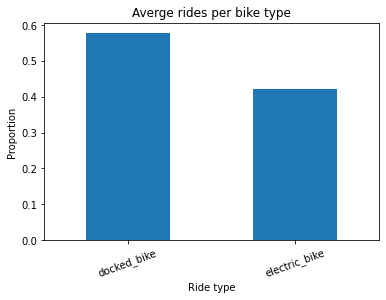

In [20]:
# Creating a univariate visualization with in relationship to the total users
(df_clean["rideable_type"].value_counts()/df_clean.shape[0]).plot(kind="bar")
plt.xlabel("Ride type")
plt.ylabel("Proportion")
plt.title("Averge rides per bike type");
plt.xticks(rotation=20);

## Membership and preference and ride duration..
something that stands out to me in this particular graph is docked casual users sometimes ride over 50 minutes..

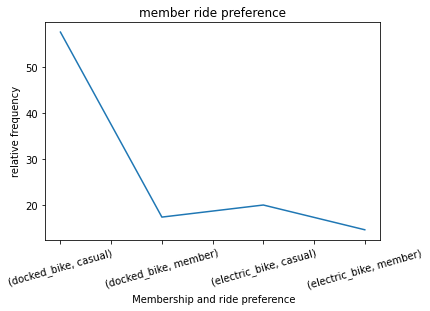

In [256]:
(df.groupby(["rideable_type", "member_casual"])["duration_min"].mean()).plot()
plt.xlabel(" Membership and ride preference")
plt.xticks(rotation=20)
plt.ylabel("relative frequency")
plt.title("member ride preference")
plt.xticks(rotation=16);

### Ride duration analysis
I used the timestamps provided to extract ride duration features. They served as key to obtaining any quantitive data, continous data.

From my analysis with this new feature it appears over eight thousand users ride around 5-15 minutes with a few riding more than 30 minutes.

In trying to get get the analysis some ride duration initially had a lot of outliers. I used the Q1 and Q3 range to obtain the IQR after that I filtered the results to classify outliers to obtain the current result.

There was also some duration times going in the negative direction. I made sure those were clipped as well.

I then wanted to plot a histogram to visually see this result.

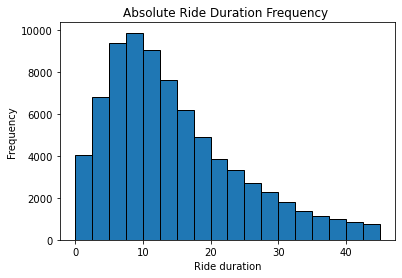

In [21]:
# Plotting a ride duration histogram
bins = np.arange(0, df_clean["duration_min"].max()+2.5, 2.5)
plt.hist(data=df, x="duration_min", bins=bins, ec="black")
plt.xlabel("Ride duration")
plt.ylabel("Frequency")
plt.title("Absolute Ride Duration Frequency ")
plt.grid(False)

## Bivariate Exploration

I wanted to know which days of the week were ride duration longer? 
It appears that on Saturdays & Sundays the average ride is around 13-14 minutes. 

Also users tend to ride longer some even over 30 minutes. 

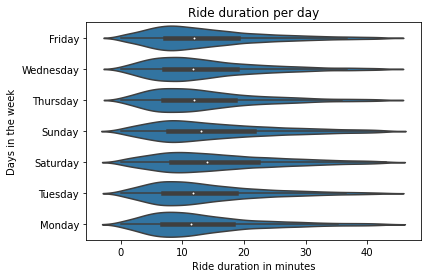

In [158]:
# Plotting Violinplot to see which days are ride duration the longest
color_base = sb.color_palette()[0]
sb.violinplot(data=df_clean, x=df_clean["duration_min"], y="ride_day_started", color=color_base,showfliers=False)
plt.xlabel("Ride duration in minutes")
plt.ylabel("Days in the week");
plt.title("Ride duration per day");

## Weekend Riders 
Users typically ride longer on the weekends specifically on saturdays..

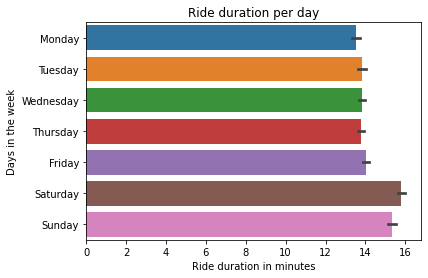

In [353]:
list(df_clean["ride_day_started"].unique())
day_of_week=['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.barplot(data=df_clean, y="ride_day_started", x="duration_min", order=day_of_week)
plt.xlabel("Ride duration in minutes")
plt.ylabel("Days in the week");
plt.title("Ride duration per day");

## Majority of ride times..
I created a sample of 500 from the dataset, and as we can see majority of the users ride from 5-15 minutes while a very few ride over 30 minutes

In [308]:
# making some frequency for number of users 
samples = np.random.choice(df_clean.shape[0], 500, replace=True)
df_samples = df_clean.iloc[samples]

cat_num = (df_samples["member_casual"].value_counts()/df_samples.shape[0])["casual"]
cat_freq = np.linspace(0, cat_num, df_samples.shape[0])

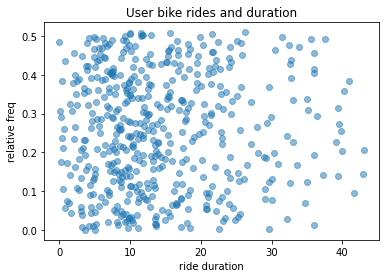

In [309]:
# Visualizing the duration and freq member freq
sb.regplot(x=df_samples["duration_min"], y=cat_freq, x_jitter=0.3, scatter_kws={"alpha":1/2}, fit_reg=False)
plt.xlabel("ride duration")
plt.ylabel("relative freq")
plt.title("User bike rides and duration");





## Multivariate Exploration

While plotting the data I was curious to see which ride type has the longest duration, and does membership group have any effects on that.

It appears that casual members for electric and docked bikes have the longest ride duration. 
While again docked bikes are the preferred choice for users.

Docked casual users have an average ride time around 14 minutes.
Electric casual users have a ride time around 12-13 minutes. 

Users with memberships on average have similar ride duration either electric or docked; however, some rides are longer if docked is chosen. 

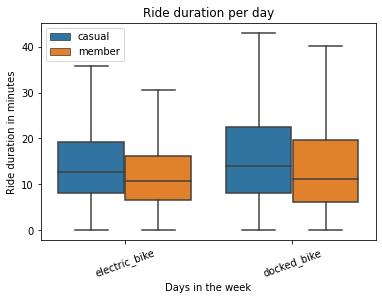

In [333]:
# Plotting a boxplot of ride duration in weeks per membership
sb.boxplot(data=df_clean, y=df_clean["duration_min"], x="rideable_type", hue="member_casual",showfliers=False)
plt.ylabel("Ride duration in minutes")
plt.xlabel("Days in the week");
plt.xticks(rotation=20)
plt.title("Ride duration per day");
plt.legend(loc="best");

## Searching for the unexpected..

While going through my data it very hard to extract more quantitive variables from anything other than ride duration, and I wanted to know what am I not seeing.
Is there some kind of correlation in my Data?

I used a heatmap to find this for me, and pandas correlation function.


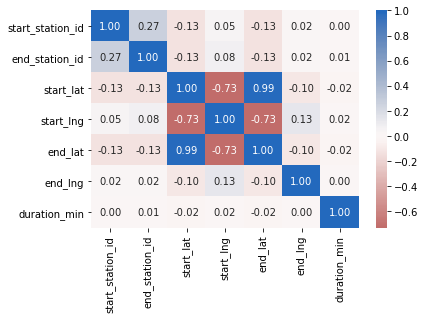

In [334]:
# Looking for correlations with heatmap
sb.heatmap(df.corr(), annot=True, fmt='.2f', cmap='vlag_r', center=0);

## Which station is most popular for members, and does it effect their ride duration?

Casual Users tend to ride longer if they start on 10th st at Empire st. 
While Members tend to ride longer if they start on 10th st at University ave

In [335]:
# Taking the top 5 station where users start at
top_5_stations = list(set(df.groupby("start_station_name")["member_casual"].value_counts().index[:10].get_level_values("start_station_name")))

In [336]:
df_top_stations = df_clean.query("start_station_name == {}".format(top_5_stations))

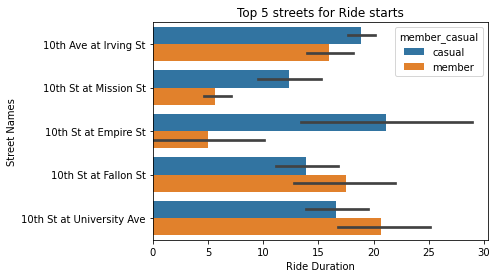

In [346]:
sb.barplot(data=df_top_stations, y="start_station_name", x="duration_min", hue="member_casual")
plt.ylabel("Street Names")
plt.xlabel("Ride Duration")
plt.title("Top 5 streets for Ride starts");


## Station Ride types, and ride duration 
I was wondering do do different station host different ride types, and what's the difference?

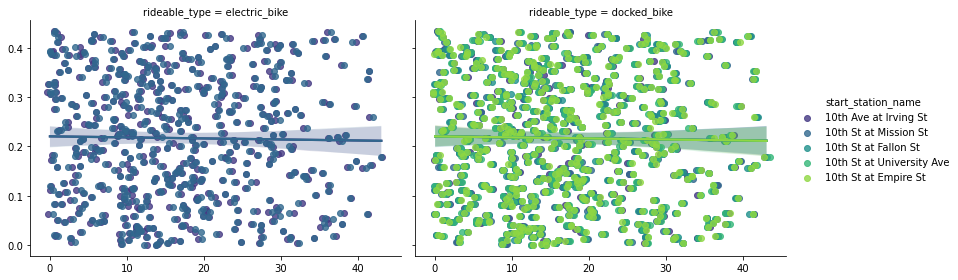

In [352]:
samples2 = np.random.choice(df_top_stations.shape[0], 500, replace=True)
df_samples2 = df_top_stations.iloc[samples2]
g = sb.FacetGrid(data=df_samples2, hue="start_station_name", col="rideable_type", size=4, aspect=1.4, palette="viridis")
g.map(sb.regplot, x=df_samples2["duration_min"], y=cas_freq, x_jitter=0.4)
g.add_legend();

In [1]:
!jupyter nbconvert Explanatory_Analysis.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Explanatory_Analysis.ipynb to slides
[NbConvertApp] Writing 537879 bytes to Explanatory_Analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Explanatory_Analysis.slides.html
Use Control-C to stop this server
^C

Interrupted
